In [ ]:
%pip install mediapipe opencv-python pandas scikit-learn

In [1]:
import mediapipe as mp
import cv2
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [2]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
)

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [4]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Flip the frame horizontally
   

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False

    image = cv2.flip(image, 1)
    results = hands.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            # Draw landmarks
            mp_drawing.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Print handedness and number of landmarks
            hand_label = handedness.classification[0].label
            landmarks_count = len(hand_landmarks.landmark)
            print(f"{hand_label} Hand has {landmarks_count} landmarks")

    cv2.imshow('Webcam Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks


In [5]:
num_coords = len(hand_landmarks.landmark)

In [6]:
num_coords

21

In [7]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

In [20]:
with open('hand.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [21]:
class_name = "Thumbs_up"

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        continue

    # Convert the frame color from BGR to RGB and flip the image.
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = cv2.flip(image, 1)
    image.flags.writeable = False

    # Process the image to detect hand landmarks.
    results = hands.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            mp_drawing.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            hand_label = handedness.classification[0].label
            landmarks_count = len(hand_landmarks.landmark)
            print(f"{hand_label} Hand has {landmarks_count} landmarks")

            # Prepare landmark data for CSV.
            hand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in hand_landmarks.landmark]).flatten())
            hand_row.insert(0, class_name)
            # Write landmark data for this hand to the CSV file.
            with open('hand.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(hand_row) 

    cv2.imshow('Webcam Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
Left Hand has 21 landmarks
L

In [8]:
df = pd.read_csv('hand.csv')

In [12]:
df.head()

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,Open_hand,0.835315,0.753567,2.020000e-07,0.759295,0.735179,-0.024003,0.696775,0.682363,-0.034189,...,-0.028867,0.826132,0.475876,-0.044289,0.814187,0.435498,-0.048954,0.800989,0.399261,-0.051490
1,Open_hand,0.146316,0.689854,6.620000e-07,0.216858,0.657329,-0.027541,0.270065,0.598955,-0.034192,...,-0.012709,0.096821,0.415445,-0.027000,0.099282,0.368725,-0.035166,0.105010,0.324465,-0.039744
2,Open_hand,0.137802,0.690049,7.070000e-07,0.207438,0.655427,-0.027700,0.265422,0.601723,-0.038692,...,-0.020190,0.094222,0.414067,-0.033631,0.096294,0.369735,-0.038142,0.100048,0.328182,-0.039730
3,Open_hand,0.140683,0.693381,7.000000e-07,0.210001,0.653720,-0.027657,0.265478,0.598697,-0.038668,...,-0.021687,0.090748,0.415192,-0.035941,0.094045,0.369852,-0.040959,0.099101,0.327473,-0.043093
4,Open_hand,0.138249,0.693746,6.900000e-07,0.207640,0.654744,-0.027736,0.263328,0.599181,-0.038857,...,-0.022609,0.089088,0.411385,-0.037797,0.090165,0.363477,-0.043714,0.092664,0.319203,-0.046284


In [11]:
df.tail()

,class,x1,y1,z1,x2,y2,z2,x3,y3,z3,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
2343,Thumbs_up,0.182636,0.657300,-4.120000e-07,0.204099,0.555349,-0.014133,0.248193,0.444883,-0.027863,...,-0.069575,0.329358,0.639376,-0.073376,0.305980,0.635856,-0.063998,0.277644,0.627870,-0.060117
2344,Thumbs_up,0.177669,0.661915,-4.430000e-07,0.201279,0.562889,-0.012514,0.248848,0.453296,-0.025110,...,-0.068187,0.329679,0.638863,-0.072081,0.305427,0.637946,-0.062853,0.276906,0.629628,-0.058824
2345,Thumbs_up,0.178312,0.655035,-4.070000e-07,0.203491,0.553847,-0.009965,0.250092,0.446114,-0.022524,...,-0.069890,0.327625,0.636857,-0.071793,0.303805,0.637010,-0.061072,0.274247,0.629433,-0.056360
2346,Thumbs_up,0.175642,0.655784,-4.080000e-07,0.199843,0.554513,-0.010576,0.246638,0.445848,-0.022973,...,-0.066603,0.328539,0.635022,-0.069351,0.304964,0.635408,-0.059394,0.276127,0.628056,-0.054766
2347,Thumbs_up,0.178990,0.653096,-3.930000e-07,0.201942,0.553095,-0.014139,0.247353,0.443778,-0.027511,...,-0.065428,0.326881,0.634961,-0.069184,0.303250,0.633931,-0.059820,0.273628,0.627054,-0.055501


In [9]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [15]:
X_test

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
370,0.865963,0.560720,3.510000e-07,0.796594,0.551610,-0.023079,0.735136,0.505102,-0.030373,0.696409,...,-0.013720,0.811673,0.303805,-0.021222,0.795372,0.271117,-0.021650,0.779085,0.242413,-0.022114
358,0.801496,0.691523,2.560000e-07,0.731101,0.671402,-0.023811,0.668633,0.612653,-0.036668,0.633519,...,-0.048158,0.816252,0.396783,-0.065679,0.810465,0.343932,-0.072670,0.803338,0.294270,-0.077022
462,0.864516,0.707591,3.450000e-07,0.787163,0.685731,-0.026325,0.718880,0.626360,-0.037346,0.675590,...,-0.034628,0.883077,0.408978,-0.048295,0.876918,0.359550,-0.052172,0.868903,0.312730,-0.054846
684,0.870867,0.526906,-3.070000e-07,0.828232,0.555110,-0.046507,0.779561,0.558822,-0.073621,0.770043,...,-0.045838,0.887292,0.373535,-0.071419,0.889616,0.413319,-0.072904,0.872518,0.419062,-0.069360
1092,0.916571,0.612140,-3.310000e-07,0.855280,0.614860,-0.019100,0.797995,0.596155,-0.033312,0.795737,...,-0.037235,0.879192,0.427023,-0.050944,0.883882,0.472350,-0.042841,0.881404,0.489660,-0.032801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.854444,0.556660,4.530000e-07,0.786700,0.536852,-0.028298,0.724419,0.488635,-0.042225,0.685661,...,-0.037222,0.866712,0.277447,-0.052187,0.858950,0.233205,-0.055591,0.848957,0.194601,-0.057342
724,0.835661,0.585917,-5.460000e-07,0.782668,0.547012,-0.013048,0.738146,0.477001,-0.019236,0.731618,...,-0.022163,0.858710,0.407825,-0.037708,0.850060,0.455468,-0.027380,0.862367,0.470814,-0.014608
678,0.868438,0.517182,-3.210000e-07,0.830373,0.552434,-0.054585,0.782918,0.555313,-0.083945,0.771375,...,-0.035424,0.884672,0.375469,-0.059899,0.888423,0.411626,-0.061983,0.873202,0.413718,-0.059107
1258,0.163692,0.448655,-3.110000e-07,0.224624,0.460604,-0.029326,0.284474,0.442864,-0.039266,0.307352,...,-0.007494,0.255269,0.276618,-0.027705,0.234001,0.312487,-0.019682,0.229129,0.336044,-0.006695


In [11]:
from sklearn.impute import SimpleImputer


pipelines = {
    'lr': make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler(), LogisticRegression()),
    'rc': make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler(), RidgeClassifier()),
    'rf': make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler(), RandomForestClassifier()),
    'gb': make_pipeline(SimpleImputer(strategy='constant', fill_value=0), StandardScaler(), GradientBoostingClassifier()),
}

# Now your pipelines include an imputation step that fills NaN values with 0, a scaling step, and the model itself.

In [12]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [18]:
fit_models

{'lr': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value=0, strategy='constant')),
                 ('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value=0, strategy='constant')),
                 ('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value=0, strategy='constant')),
                 ('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value=0, strategy='constant')),
                 ('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [19]:
fit_models['rf'].predict(X_test)

array(['Open_hand', 'Open_hand', 'Open_hand', 'Closed_hand',
       'Closed_hand', 'Open_hand', 'Thumbs_up', 'Closed_hand',
       'Thumbs_up', 'Thumbs_up', 'Closed_hand', 'Thumbs_up', 'Open_hand',
       'Closed_hand', 'Open_hand', 'Closed_hand', 'Open_hand',
       'Closed_hand', 'Thumbs_up', 'Thumbs_up', 'Open_hand', 'Thumbs_up',
       'Thumbs_up', 'Open_hand', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up',
       'Thumbs_up', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up', 'Closed_hand',
       'Open_hand', 'Closed_hand', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up',
       'Closed_hand', 'Open_hand', 'Open_hand', 'Thumbs_up',
       'Closed_hand', 'Closed_hand', 'Thumbs_up', 'Open_hand',
       'Open_hand', 'Closed_hand', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up',
       'Thumbs_up', 'Open_hand', 'Thumbs_up', 'Open_hand', 'Open_hand',
       'Closed_hand', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up',
       'Open_hand', 'Open_hand', 'Thumbs_up', 'Closed_hand', 'Open_hand',
       'Closed_hand', 'Open

In [20]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9943262411347518
rc 0.9900709219858156
rf 0.9957446808510638
gb 0.9957446808510638


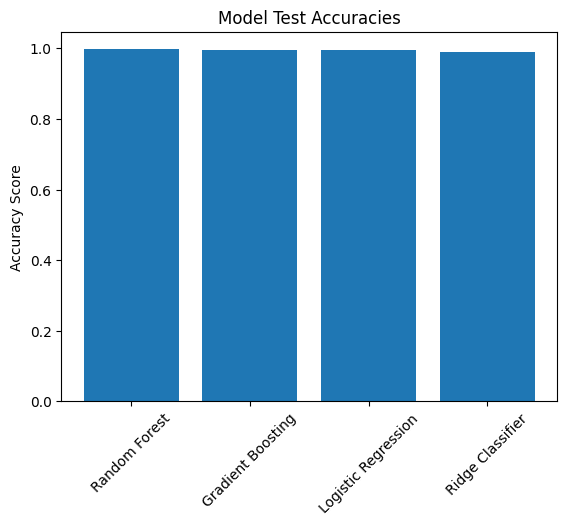

In [21]:
import matplotlib.pyplot as plt

# Assuming you have stored accuracy scores in a dictionary like this:
accuracy_scores = {
    'Logistic Regression': 0.9943262411347518,
    'Ridge Classifier': 0.9900709219858156,
    'Random Forest': 0.9971631205673759,
    'Gradient Boosting': 0.9957446808510638
}

# Sorting the dictionary by accuracy score for better visual representation
sorted_accuracy = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

# Plotting the accuracy scores
plt.bar(range(len(sorted_accuracy)), list(sorted_accuracy.values()), align='center')
plt.xticks(range(len(sorted_accuracy)), list(sorted_accuracy.keys()), rotation=45)
plt.ylabel('Accuracy Score')
plt.title('Model Test Accuracies')
plt.show()


In [22]:
y_pred = model.predict(X)

In [23]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y, y_pred, labels=model.classes_)


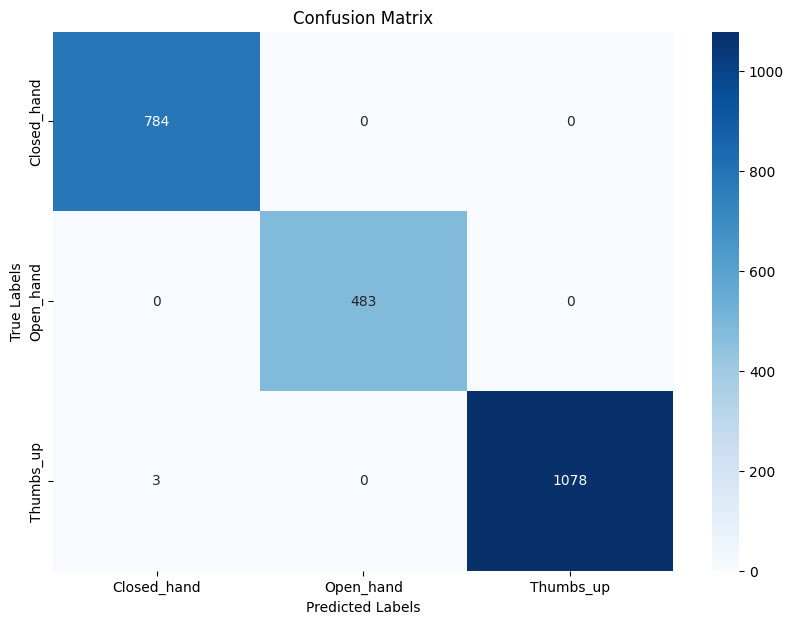

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

 Closed_hand       1.00      1.00      1.00       784
   Open_hand       1.00      1.00      1.00       483
   Thumbs_up       1.00      1.00      1.00      1081

    accuracy                           1.00      2348
   macro avg       1.00      1.00      1.00      2348
weighted avg       1.00      1.00      1.00      2348



In [19]:
fit_models['gb'].predict(X_test)

array(['Open_hand', 'Open_hand', 'Open_hand', 'Closed_hand',
       'Closed_hand', 'Open_hand', 'Thumbs_up', 'Closed_hand',
       'Thumbs_up', 'Thumbs_up', 'Closed_hand', 'Thumbs_up', 'Open_hand',
       'Closed_hand', 'Open_hand', 'Closed_hand', 'Open_hand',
       'Closed_hand', 'Thumbs_up', 'Thumbs_up', 'Open_hand', 'Thumbs_up',
       'Thumbs_up', 'Open_hand', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up',
       'Thumbs_up', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up', 'Closed_hand',
       'Open_hand', 'Closed_hand', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up',
       'Closed_hand', 'Open_hand', 'Open_hand', 'Thumbs_up',
       'Closed_hand', 'Closed_hand', 'Thumbs_up', 'Open_hand',
       'Open_hand', 'Closed_hand', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up',
       'Thumbs_up', 'Open_hand', 'Thumbs_up', 'Open_hand', 'Open_hand',
       'Closed_hand', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up', 'Thumbs_up',
       'Open_hand', 'Open_hand', 'Thumbs_up', 'Closed_hand', 'Open_hand',
       'Closed_hand', 'Open

In [20]:
y_test

370       Open_hand
358       Open_hand
462       Open_hand
684     Closed_hand
1092    Closed_hand
           ...     
240       Open_hand
724     Closed_hand
678     Closed_hand
1258    Closed_hand
2335      Thumbs_up
Name: class, Length: 705, dtype: object

In [35]:
with open('hand_gesture.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)

In [30]:
with open('hand_gesturerc.pkl', 'rb') as f:
    model = pickle.load(f)

In [37]:
# Access hyperparameters
lr_hyperparameters = fit_models['lr'].named_steps['logisticregression'].get_params()

# Access weights
lr_weights = fit_models['lr'].named_steps['logisticregression'].coef_

print("Logistic Regression Hyperparameters:", lr_hyperparameters)
print("Logistic Regression Weights:", lr_weights)


Logistic Regression Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression Weights: [[ 1.06311843e-02 -4.87041052e-01 -7.66014602e-01  4.94673444e-02
  -7.35522281e-01  4.12259713e-01  1.58322443e-01 -2.52857001e-01
  -1.35479260e-01  1.75599667e-01  4.89891118e-01 -3.52733688e-01
   4.13202763e-01  2.03079799e+00 -1.62385328e-01  1.20971651e-01
   1.99976779e-02 -7.02722364e-02 -4.40425494e-02 -2.97770770e-01
  -1.76680007e-01 -7.20912616e-02  4.76396018e-01  1.20675914e-01
  -9.53159752e-02  1.36154938e+00  4.25336040e-01 -5.13986476e-02
   1.59394251e-01 -1.98345401e-01 -6.88457686e-02 -5.47204995e-01
  -2.34054118e-01  8.15026347e-02 -3.83377282e-01  3.10496946e-01
   1.14968262e-01  5.10272352e-02  7.85097802e-01 -1.93178425e-

In [22]:
model

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value=0, strategy='constant')),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [30]:
webam = cv2.VideoCapture(0)

while webam.isOpened():
    ret, frame = webam.read()
    if not ret:
        continue

    # Process the frame
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    image = cv2.flip(image, 1)
    results = hands.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    if results.multi_hand_landmarks:
        for hand_landmarks, handedness in zip(results.multi_hand_landmarks, results.multi_handedness):
            # Draw landmarks
            mp_drawing.draw_landmarks(
                image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Prepare the hand landmarks as model input
            landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([landmarks])
            gesture_class = model.predict(X)[0]
            gesture_prob = model.predict_proba(X)[0]

            # Display the prediction
            wrist_coords = np.multiply(
                np.array((hand_landmarks.landmark[0].x, hand_landmarks.landmark[0].y)), [640, 480]
            ).astype(int)
            cv2.putText(image, gesture_class, (wrist_coords[0], wrist_coords[1]),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.putText(image, f"{max(gesture_prob):.2f}", (wrist_coords[0], wrist_coords[1]+30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('Webcam Feed', image)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

webam.release()
cv2.destroyAllWindows()

c:\Users\Hyder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Hyder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Hyder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Hyder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\Hyder\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer wa

In [15]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y, y, labels=model.classes_)


In [36]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import pickle
import warnings
import glob
import os
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Suppress specific UserWarning
warnings.filterwarnings(action='ignore', category=UserWarning, message='.*X does not have valid feature names.*')

# Load your trained model

with open('hand_gesture.pkl', 'rb') as f:
    model = pickle.load(f)

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
)
mp_drawing = mp.solutions.drawing_utils

base_dir = 'D:/image_dataset/hand/'
classes = {
    'Open_hand': 'open_hand',
    'Closed_hand': 'closed_hand',
    'Thumbs_up': 'thumbs_up',
}

true_labels = []
predicted_labels = []

def process_and_predict(image_path, true_class):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    prediction = None
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([landmarks])
            prediction = model.predict(X)[0]
    return prediction

for true_class, folder_name in classes.items():
    folder_path = os.path.join(base_dir, folder_name)
    # Adjust here to include both JPG and PNG images
    image_paths = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.png'))
    for image_path in image_paths:
        prediction = process_and_predict(image_path, true_class)
        if prediction is not None:
            true_labels.append(true_class)
            predicted_labels.append(prediction)
            print(f"Image: {os.path.basename(image_path)}, True Class: {true_class}, Predicted: {prediction}")

# Encode labels
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
predicted_labels_encoded = label_encoder.transform(predicted_labels)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(true_labels_encoded, predicted_labels_encoded)
conf_matrix = confusion_matrix(true_labels_encoded, predicted_labels_encoded)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Image: 46.jpg, True Class: Open_hand, Predicted: Open_hand
Image: 47B.jpg, True Class: Open_hand, Predicted: Open_hand
Image: 49B.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 50.jpg, True Class: Open_hand, Predicted: Open_hand
Image: 51B.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 52.jpg, True Class: Open_hand, Predicted: Open_hand
Image: 53.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 54.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 55B.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 56.jpg, True Class: Open_hand, Predicted: Thumbs_up
Image: 57.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 58.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 59B.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 60B.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 63.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 64B.jpg, True Class: Open_hand, Predicted: Closed_hand
Image: 1.png, True Class: O

Accuracy: 0.8652482269503546
Confusion Matrix:
[[33  0  0]
 [ 5 36 11]
 [ 3  0 53]]
              precision    recall  f1-score   support

 Closed_hand       0.80      1.00      0.89        33
   Open_hand       1.00      0.69      0.82        52
   Thumbs_up       0.83      0.95      0.88        56

    accuracy                           0.87       141
   macro avg       0.88      0.88      0.86       141
weighted avg       0.89      0.87      0.86       141



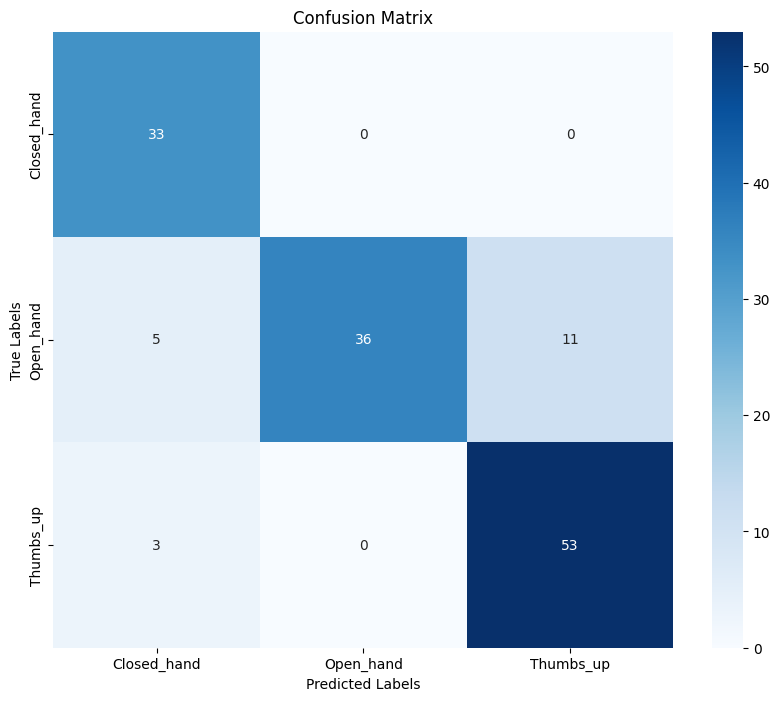

In [45]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import pickle
import warnings
import glob
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific UserWarning
warnings.filterwarnings(action='ignore', category=UserWarning, message='.*X does not have valid feature names.*')

# Load your trained model
with open('hand_gesturerc.pkl', 'rb') as f:
    model = pickle.load(f)

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5,
)
mp_drawing = mp.solutions.drawing_utils

base_dir = 'D:/image_dataset/hand/'
classes = {
    'Open_hand': 'open_hand',
    'Closed_hand': 'closed_hand',
    'Thumbs_up': 'thumbs_up',
}

true_labels = []
predicted_labels = []

def process_and_predict(image_path, true_class):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}")
        return None

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)
    prediction = None
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            landmarks = np.array([[lm.x, lm.y, lm.z] for lm in hand_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([landmarks])
            prediction = model.predict(X)[0]
    return prediction

for true_class, folder_name in classes.items():
    folder_path = os.path.join(base_dir, folder_name)
    image_paths = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.png'))
    for image_path in image_paths:
        prediction = process_and_predict(image_path, true_class)
        if prediction is not None:
            true_labels.append(true_class)
            predicted_labels.append(prediction)

# Encode labels for computation
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
predicted_labels_encoded = label_encoder.transform(predicted_labels)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(true_labels_encoded, predicted_labels_encoded)
conf_matrix = confusion_matrix(true_labels_encoded, predicted_labels_encoded)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Classification report for precision, recall, f1-score, and accuracy
report = classification_report(true_labels_encoded, predicted_labels_encoded, target_names=label_encoder.classes_)
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [47]:
print(classification_report(true_labels_encoded, predicted_labels_encoded, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

 Closed_hand       0.80      1.00      0.89        33
   Open_hand       1.00      0.69      0.82        52
   Thumbs_up       0.83      0.95      0.88        56

    accuracy                           0.87       141
   macro avg       0.88      0.88      0.86       141
weighted avg       0.89      0.87      0.86       141



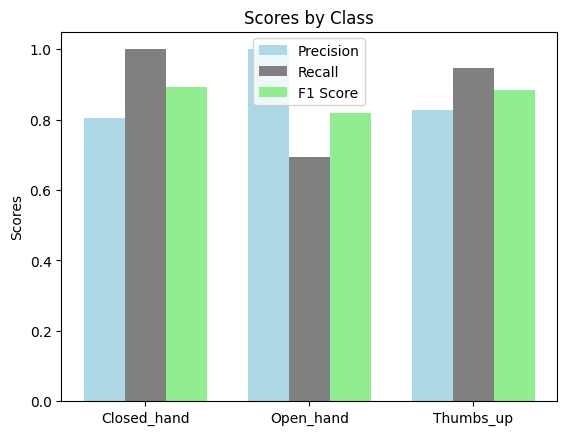

In [46]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

metrics = precision_recall_fscore_support(true_labels_encoded, predicted_labels_encoded, average=None, labels=np.unique(true_labels_encoded))
precision, recall, f1, _ = metrics

# For plotting
categories = label_encoder.classes_

x = np.arange(len(categories))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision', color='lightblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='grey')
rects3 = ax.bar(x + width, f1, width, label='F1 Score', color='lightgreen')


ax.set_ylabel('Scores')
ax.set_title('Scores by Class')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()